In [1]:
# prompt: mount google

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
train_result = pd.read_csv('/content/drive/MyDrive/REL301m/predict_transaction_history_train.csv')
train_result.head()

,step,date,action_type,raw_amount,price,cash,stock_owned,reward,portfolio_value,done
0,1,2015-08-03,-1.000000,0.0,97.449997,100000.000000,0,0.000000,100000.000000,False
1,2,2015-08-04,1.000000,0.0,97.809998,56050.051353,451,0.000000,100162.360451,False
2,3,2015-08-05,-1.000000,0.0,99.190002,65733.241155,352,3.565634,100648.121859,False
3,4,2015-08-06,0.261062,0.0,99.150002,36868.950573,643,0.006481,100622.401859,False
4,5,2015-08-07,-1.000000,0.0,99.099998,50849.100855,502,14.354442,100597.299851,False


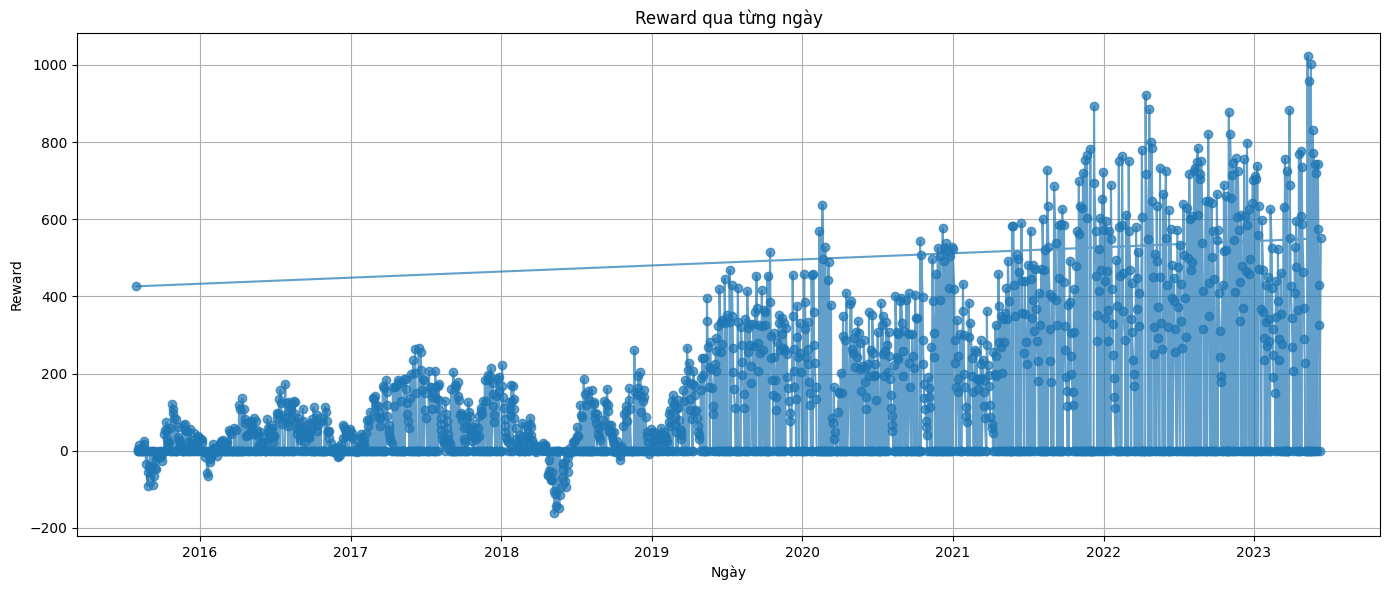

In [31]:
# Chuyển cột 'date' về dạng datetime
train_result["date"] = pd.to_datetime(train_result["date"])

# Vẽ biểu đồ reward theo ngày
plt.figure(figsize=(14, 6))
plt.plot(train_result["date"], train_result["reward"], marker='o', linestyle='-', alpha=0.7)
plt.title("Reward qua từng ngày")
plt.xlabel("Ngày")
plt.ylabel("Reward")
plt.grid(True)
plt.tight_layout()
plt.show()

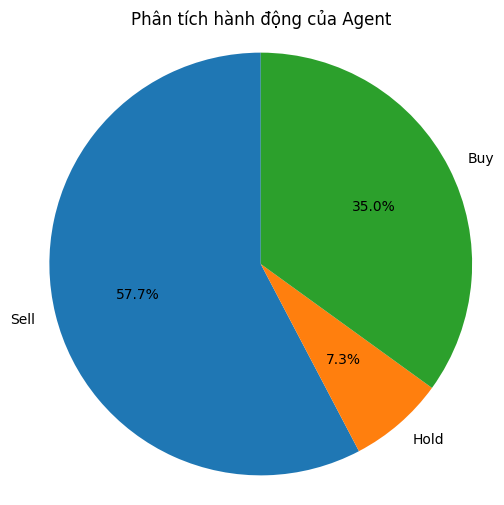

In [33]:
# Làm tròn action_type để đảm bảo đúng 3 loại: -1, 0, 1
train_result["action_type"] = train_result["action_type"].round()

# Đếm số lượng mỗi loại hành động
action_counts = train_result["action_type"].value_counts().sort_index()

# Gán nhãn hành động
action_labels = {
    -1.0: "Sell",
     0.0: "Hold",
     1.0: "Buy"
}
labels = [action_labels.get(k, str(k)) for k in action_counts.index]

# Vẽ pie chart
plt.figure(figsize=(6, 6))
plt.pie(action_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Phân tích hành động của Agent")
plt.axis('equal')  # Đảm bảo hình tròn
plt.show()

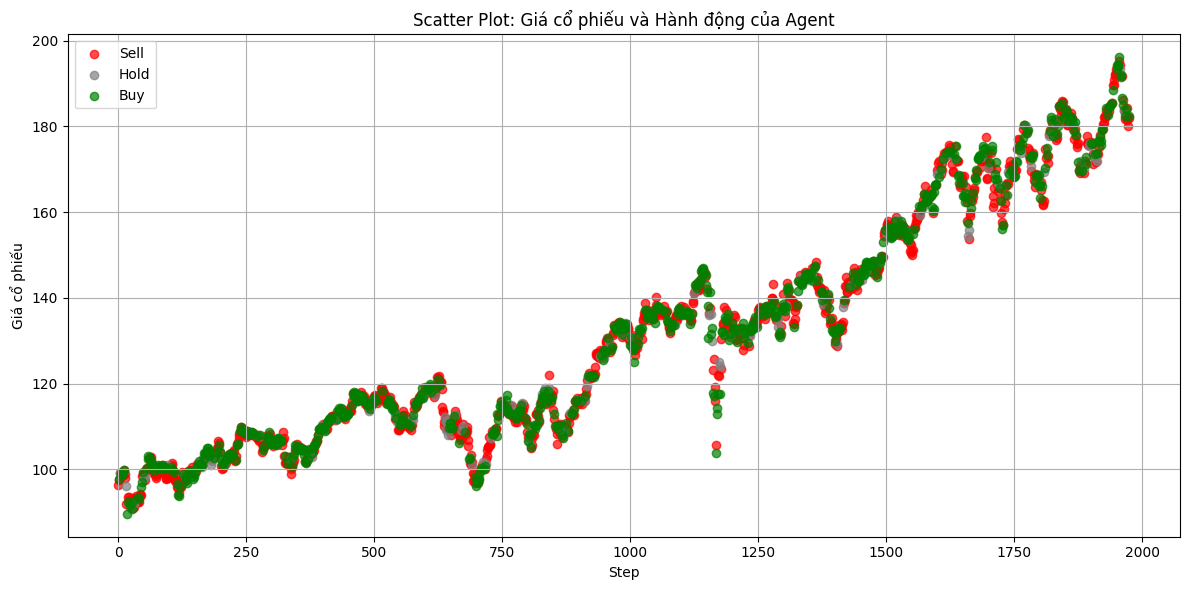

In [34]:
# Làm tròn action_type về -1, 0, 1 (nếu cần)
train_result["action_type"] = train_result["action_type"].round()

# Tạo scatter plot: Mỗi hành động một màu
plt.figure(figsize=(12, 6))

colors = {-1.0: 'red', 0.0: 'gray', 1.0: 'green'}
labels = {-1.0: 'Sell', 0.0: 'Hold', 1.0: 'Buy'}

for action_value in [-1.0, 0.0, 1.0]:
    subset = train_result[train_result["action_type"] == action_value]
    plt.scatter(subset["step"], subset["price"],
                label=labels[action_value],
                color=colors[action_value], alpha=0.7)

plt.title("Scatter Plot: Giá cổ phiếu và Hành động của Agent")
plt.xlabel("Step")
plt.ylabel("Giá cổ phiếu")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

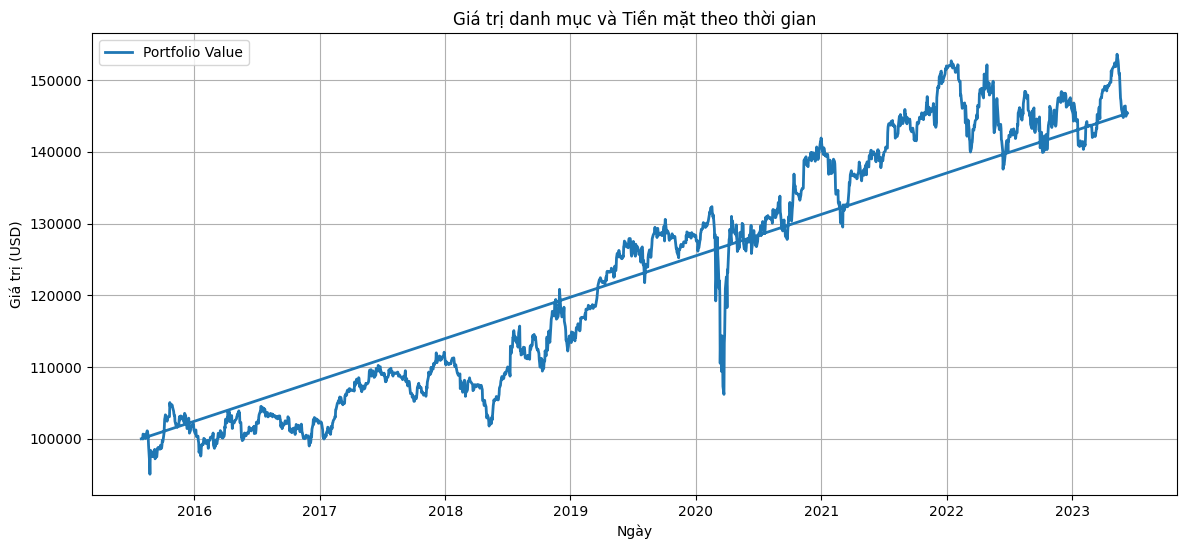

In [39]:
# Chuyển cột 'date' thành kiểu datetime
train_result["date"] = pd.to_datetime(train_result["date"])

# Vẽ biểu đồ đường
plt.figure(figsize=(14, 6))
plt.plot(train_result["date"], train_result["portfolio_value"], label="Portfolio Value", linewidth=2)
plt.title("Giá trị danh mục và Tiền mặt theo thời gian")
plt.xlabel("Ngày")
plt.ylabel("Giá trị (USD)")
plt.legend()
plt.grid(True)
plt.show()

In [5]:
max(train_result['portfolio_value'])

153615.14817900016

In [7]:
train_result[train_result['reward'] == max(train_result['reward'])]

,step,date,action_type,raw_amount,price,cash,stock_owned,reward,portfolio_value,done
1953,1954,2023-05-11,-1.0,0.0,195.34,43320.048179,562,1023.56433,153101.128179,False


In [26]:
train_result['price'].iloc[-2]

np.float64(181.9)

In [23]:
train_result['price'].iloc[-2] - train_result['price'].iloc[0]

np.float64(84.45000300000001)

In [4]:
test_result = pd.read_csv('/content/drive/MyDrive/REL301m/predict_transaction_history_test.csv')
test_result.head()

,step,date,action_type,raw_amount,price,cash,stock_owned,reward,portfolio_value,done
0,1,2023-08-01,1.0,0.0,186.82,56134.36,234,0.000000,99850.24,False
1,2,2023-08-02,-1.0,0.0,188.31,65662.18,183,-3.265498,100122.91,False
2,3,2023-08-03,-1.0,0.0,187.12,73194.58,143,3.401229,99952.74,False
3,4,2023-08-04,-1.0,0.0,184.60,78995.30,112,-1.054473,99670.50,False
4,5,2023-08-07,1.0,0.0,186.89,44290.50,300,-0.003295,100357.50,False


In [8]:
max(test_result['portfolio_value'])

108001.12999999996

In [10]:
min(test_result['reward'])

-450.59003

In [11]:
max(test_result['reward'])

138.61034

In [27]:
test_result['price'].iloc[0] - test_result['price'].iloc[-2]

np.float64(54.51999999999998)

In [29]:
test_result['price'].iloc[-2]

np.float64(132.3)

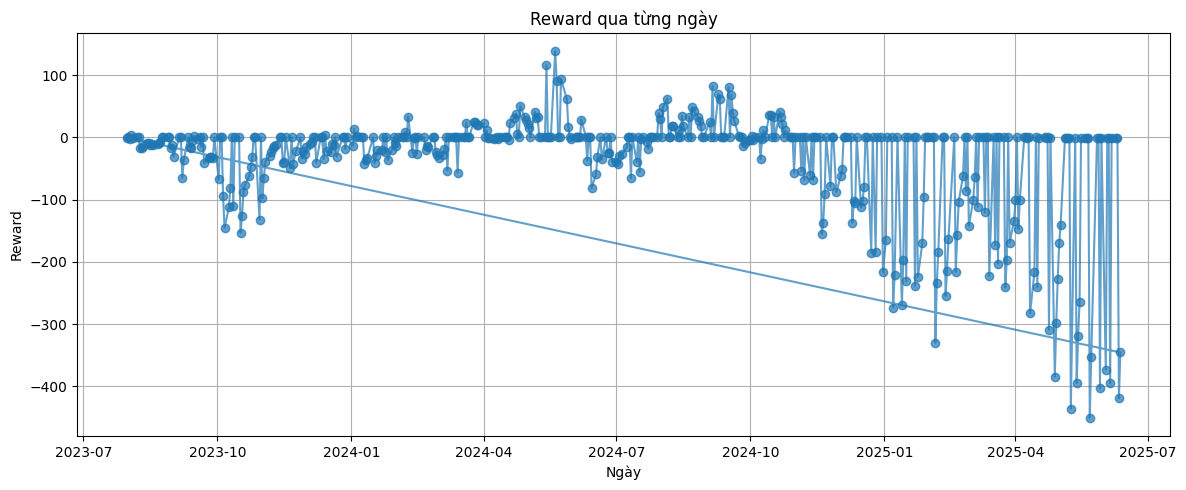

In [41]:
# Chuyển cột 'date' về dạng datetime
test_result["date"] = pd.to_datetime(test_result["date"])

# Vẽ biểu đồ reward theo ngày
plt.figure(figsize=(12, 5))
plt.plot(test_result["date"], test_result["reward"], marker='o', linestyle='-', alpha=0.7)
plt.title("Reward qua từng ngày")
plt.xlabel("Ngày")
plt.ylabel("Reward")
plt.grid(True)
plt.tight_layout()
plt.show()

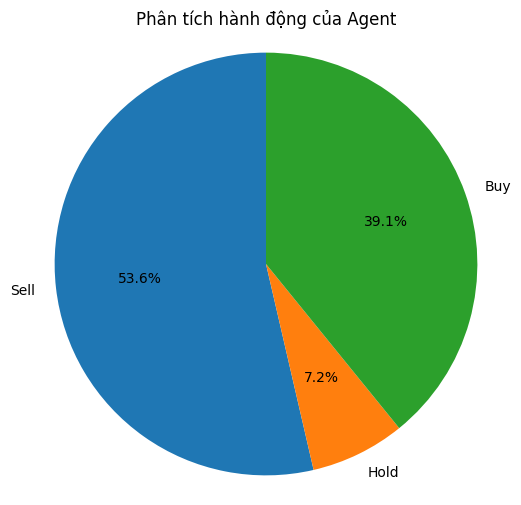

In [42]:
# Làm tròn action_type để đảm bảo đúng 3 loại: -1, 0, 1
test_result["action_type"] = test_result["action_type"].round()

# Đếm số lượng mỗi loại hành động
action_counts = test_result["action_type"].value_counts().sort_index()

# Gán nhãn hành động
action_labels = {
    -1.0: "Sell",
     0.0: "Hold",
     1.0: "Buy"
}
labels = [action_labels.get(k, str(k)) for k in action_counts.index]

# Vẽ pie chart
plt.figure(figsize=(6, 6))
plt.pie(action_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title("Phân tích hành động của Agent")
plt.axis('equal')  # Đảm bảo hình tròn
plt.show()

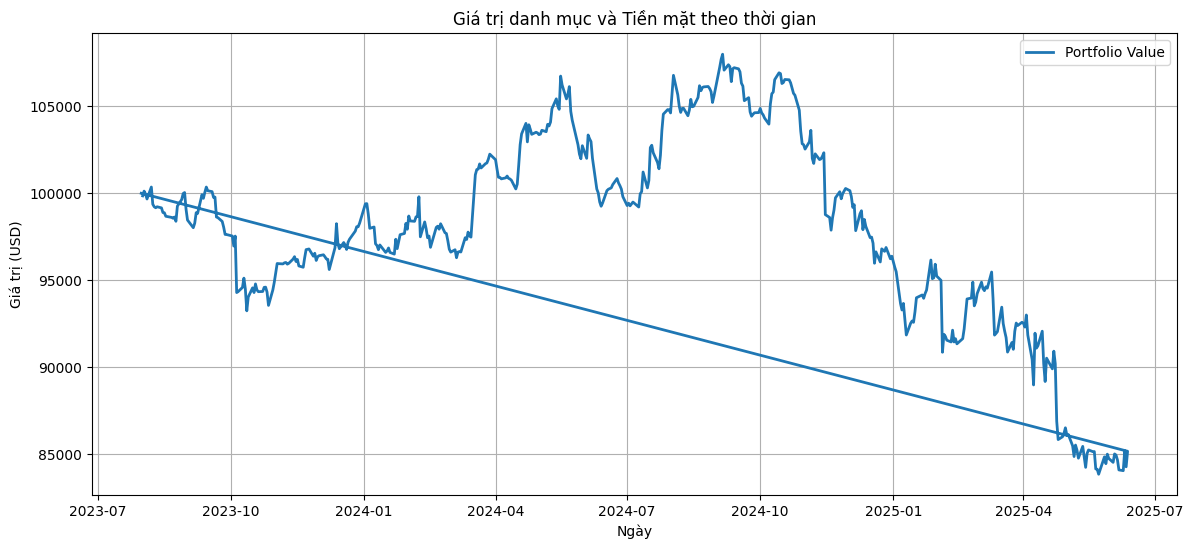

In [43]:
# Chuyển cột 'date' thành kiểu datetime
test_result["date"] = pd.to_datetime(test_result["date"])

# Vẽ biểu đồ đường
plt.figure(figsize=(14, 6))
plt.plot(test_result["date"], test_result["portfolio_value"], label="Portfolio Value", linewidth=2)
plt.title("Giá trị danh mục và Tiền mặt theo thời gian")
plt.xlabel("Ngày")
plt.ylabel("Giá trị (USD)")
plt.legend()
plt.grid(True)
plt.show()